# Advertising Sales Channel Prediction

 Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv'
df=pd.read_csv(url)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Checking Null Values

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

as we can see no null values is present in dataset, so we move forward towards EDA process

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Visualization of Data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Count'>

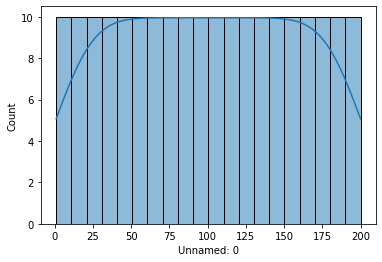

In [8]:
sns.histplot(x='Unnamed: 0',bins=20,data=df,kde=True)

<AxesSubplot:xlabel='TV', ylabel='Count'>

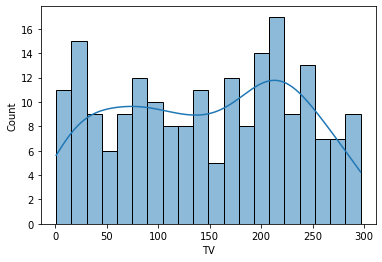

In [9]:
sns.histplot(x='TV',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='radio', ylabel='Count'>

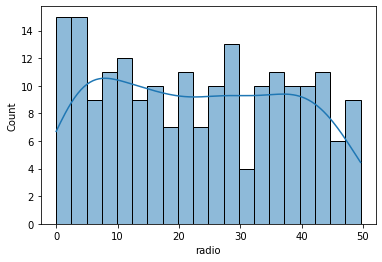

In [10]:
sns.histplot(x='radio',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

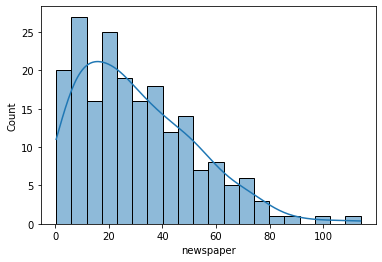

In [11]:
sns.histplot(x='newspaper',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='sales', ylabel='Count'>

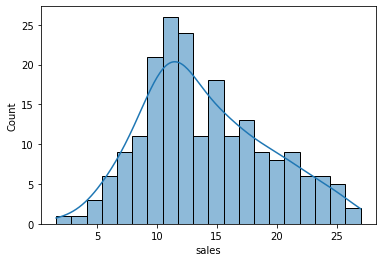

In [12]:
sns.histplot(x='sales',data=df,bins=20,kde=True)

# Describe Dataset

In [13]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

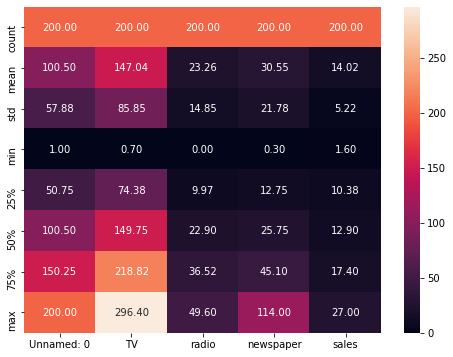

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.describe(),data=df,annot=True,fmt='0.2f')

# Checking correlation

In [15]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

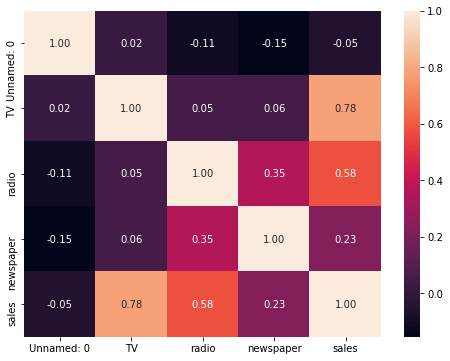

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',data=df)

Checking Positive and Negative correlation

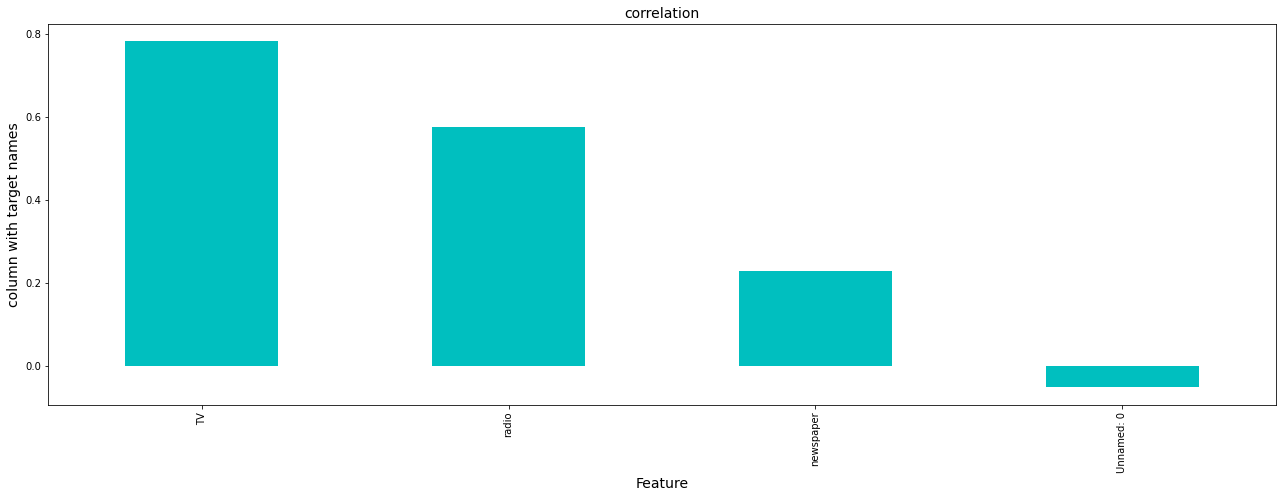

In [17]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=14)
plt.show()

In [18]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

-/+ 0.5 as the threshold

# Checking outliers

<AxesSubplot:>

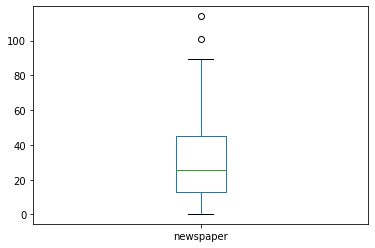

In [19]:
df['newspaper'].plot.box()

# Considering outlier removal

In [20]:
df.shape

(200, 5)

In [21]:
from scipy.stats import zscore

In [22]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101]), array([3, 3]))

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Percentage Data loss

In [24]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

# Separating Columns into features and target

In [25]:
x=df.drop('sales',axis=1)
y=df['sales']

In [26]:
from sklearn.preprocessing import power_transform

In [27]:
x=power_transform(x,method='yeo-johnson')
x

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [29]:
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[0.        , 0.8271509 , 0.83391432, 0.79088044],
       [0.01276609, 0.23493581, 0.85600341, 0.64118352],
       [0.02436649, 0.1086211 , 0.94968935, 0.79142888],
       [0.03517063, 0.60364273, 0.88497336, 0.72914393],
       [0.04537986, 0.68990034, 0.34897604, 0.7285357 ],
       [0.05511952, 0.05989711, 0.99059239, 0.82192355],
       [0.06447447, 0.28719024, 0.75780482, 0.45671577],
       [0.07350557, 0.50642617, 0.53238076, 0.30502322],
       [0.08225841, 0.05926817, 0.09818667, 0.03958012],
       [0.09076824, 0.74384478, 0.11708761, 0.4317371 ],
       [0.0990631 , 0.3200438 , 0.22019838, 0.46402742],
       [0.10716572, 0.78520006, 0.6123993 , 0.14876023],
       [0.11509489, 0.14220052, 0.79331389, 0.7725032 ],
       [0.12286633, 0.43168118, 0.26975835, 0.22555908],
       [0.13049341, 0.75586096, 0.7593675 , 0.64755399],
       [0.13798761, 0.73147799, 0.974347  , 0.69405383],
       [0.14535888, 0.32640158, 0.8160074 , 1.        ],
       [0.15261589, 0.96187939,

In [30]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state{i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state{i}, the testing accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')
    
    

At random state0, the training accuracy is :- 0.9132696317827832
At random state0, the testing accuracy is :- 0.8811798295875324


At random state1, the training accuracy is :- 0.9072105743626194
At random state1, the testing accuracy is :- 0.8960231291085182


At random state2, the training accuracy is :- 0.9183791537646105
At random state2, the testing accuracy is :- 0.8125409856286658


At random state3, the training accuracy is :- 0.9045196673318758
At random state3, the testing accuracy is :- 0.9173593907346816


At random state4, the training accuracy is :- 0.9058689018042966
At random state4, the testing accuracy is :- 0.8995973503246707


At random state5, the training accuracy is :- 0.9058210406242954
At random state5, the testing accuracy is :- 0.910959169632754


At random state6, the training accuracy is :- 0.9032285318233372
At random state6, the testing accuracy is :- 0.9256522582734472


At random state7, the training accuracy is :- 0.9024397997123862
At random state7, t

In [31]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
pred_test=lr.predict(x_test)

In [34]:
pred_test

array([10.80658937,  7.69738973,  6.34831231, 23.2402096 , 12.34627651,
        6.50433967, 11.44701075, 15.00360237, 10.5962446 , 16.76495293,
       22.33529444,  9.73282339, 10.22522114, 15.9834065 , 12.15417554,
       13.11431766, 18.94365849,  9.13057076, 15.52782919, 17.72451484,
       23.13534546,  9.31156929, 15.87255447, 13.1051246 ,  5.30565836,
       15.57749387, 12.72612691, 20.40762278, 12.89173475,  9.10586664,
       13.36139623, 20.91907812, 18.0182323 , 20.87544129,  6.45458882,
        5.81430632,  8.34972174, 13.79732357, 14.45714522,  6.10926136])

In [35]:
print(r2_score(y_test,pred_test))

0.8811798295875324


# Cross Validation of the model

In [36]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.8870253267919482 and the accuracy score for training is -0.9585791444226586 and the accuracy score for testing is 0.8811798295875324


At cross fold 3 the cv score is 0.8997214482695925 and the accuracy score for training is -0.9585791444226586 and the accuracy score for testing is 0.8811798295875324


At cross fold 4 the cv score is 0.8956922491130904 and the accuracy score for training is -0.9585791444226586 and the accuracy score for testing is 0.8811798295875324


At cross fold 5 the cv score is 0.8953473674194841 and the accuracy score for training is -0.9585791444226586 and the accuracy score for testing is 0.8811798295875324


At cross fold 6 the cv score is 0.8989475213938137 and the accuracy score for training is -0.9585791444226586 and the accuracy score for testing is 0.8811798295875324


At cross fold 7 the cv score is 0.8941723706624095 and the accuracy score for training is -0.9585791444226586 and the accuracy score for testing is 0.88117

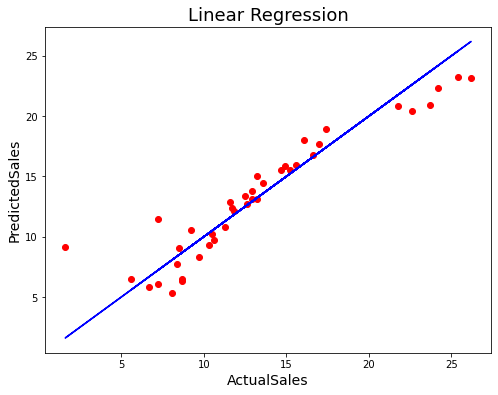

In [37]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('ActualSales',fontsize=14)
plt.ylabel('PredictedSales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [40]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls= ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8819774442242416

In [41]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8967315932403217

# Ensemble Technique

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [43]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 96.98851373882323
Cross Val Score : 97.37904203247071


We are getting model accuracy aand cross validation both almost 97%, so our model is working extremely well

# Saving the Model

In [44]:
import pickle
filename='sales.pk1'
pickle.dump(rf, open(filename,'wb'))

# Conclusion

In [45]:
loaded_model=pickle.load(open('sales.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9698851373882323


In [46]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,10.587,9.645,9.334,24.714,12.431,9.15,7.169,12.612,8.81,16.343,...,11.82,22.743,15.15,22.669,6.4,6.926,10.111,14.374,12.428,7.253
Original,10.587,9.645,9.334,24.714,12.431,9.15,7.169,12.612,8.81,16.343,...,11.82,22.743,15.15,22.669,6.4,6.926,10.111,14.374,12.428,7.253
